In [1]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 4.4 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=9144c6abe1ad2588053937c98bec5eafad13778552858745b76d5c9062d8bb3a
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [5]:
from sklearn.neighbors import KNeighborsClassifier
import mglearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
#説明変数X, 目的変数yを定義せよ
X, y = mglearn.datasets.make_forge()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


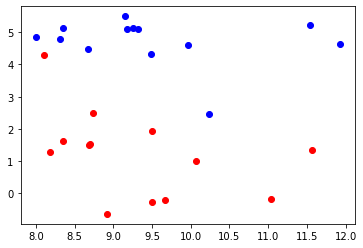

In [7]:
#yの値によって色分けされたX,yに関する散布図を作成せよ
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="r")
plt.scatter(X[y == 1, 0], X[y == 1, 1], c="b")
plt.show()

In [16]:
#データを訓練データとテストデータに分け、訓練データを用いてknnのモデルを作成せよ
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [17]:
#訓練データとテストデータのスコアを確認せよ
print("train accuracy: {}".format(knn.score(X_train, y_train)))
print("test accuracy: {}".format(knn.score(X_test, y_test)))

train accuracy: 0.9473684210526315
test accuracy: 0.8571428571428571


In [24]:
#(時間が余った人向け)グリッドサーチにより最適なkの値を求めよ
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
cv = KFold(n_splits=3, shuffle=True, random_state=42)
params = {
    "n_neighbors":list(range(1, 11, 1))
}

gridcv = GridSearchCV(knn, param_grid=params, scoring="accuracy", n_jobs=-1, cv=cv)
gridcv.fit(X_train, y_train)

best_params = gridcv.best_params_
best_score = gridcv.best_score_
print(f'best parameter {best_params}\nscore {best_score}')
knn_optimized = KNeighborsClassifier(**best_params)
knn_optimized.fit(X_train, y_train)
#print(f"train accuracy: {knn_optimized.score(X_train, y_train)}")
print(f"test accuracy: {knn_optimized.score(X_test, y_test)}")

best parameter {'n_neighbors': 3}
score 0.9444444444444445
train accuracy: 0.9473684210526315
test accuracy: 0.8571428571428571


In [26]:
gridcv.cv_results_["mean_test_score"]

array([0.8015873 , 0.8015873 , 0.94444444, 0.94444444, 0.94444444,
       0.94444444, 0.94444444, 0.84920635, 0.94444444, 0.53174603])

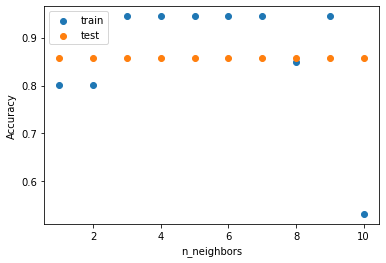

In [31]:
train_accuracy = gridcv.cv_results_["mean_test_score"]
test_accuracy  = []
n_neighbors = range(1, 11)

for k in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    #train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.scatter(n_neighbors, train_accuracy, label="train")
plt.scatter(n_neighbors, test_accuracy, label="test")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()